# [주식 데이터 다운로드](https://bigdata-doctrine.tistory.com/6#google_vignette)

In [42]:
import yfinance as yf

# Apple 주식 데이터 다운로드
aapl = yf.Ticker("AAPL")

# 2020년 한 해 동안의 주가 데이터 가져오기
df = aapl.history(period="1y")

In [43]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00-05:00,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0
2024-01-05 00:00:00-05:00,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0
2024-01-08 00:00:00-05:00,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0
2024-01-09 00:00:00-05:00,183.023358,184.247357,181.839157,184.237411,42841800,0.0,0.0
2024-01-10 00:00:00-05:00,183.451277,185.491271,183.023365,185.282303,46792900,0.0,0.0


In [44]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-04 00:00:00-05:00,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0
1,2024-01-05 00:00:00-05:00,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0
2,2024-01-08 00:00:00-05:00,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0
3,2024-01-09 00:00:00-05:00,183.023358,184.247357,181.839157,184.237411,42841800,0.0,0.0
4,2024-01-10 00:00:00-05:00,183.451277,185.491271,183.023365,185.282303,46792900,0.0,0.0


## [주식 그래프 기르기](https://plotly.com/python/financial-charts/)

In [45]:
import plotly.graph_objects as go

In [46]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# [볼린저 밴드(Bollinger Bands)](https://timepercentcorp.com/patchnote/bol-band)


- 볼린저 밴드는 주가의 변동성을 시각적으로 표현하여 시장 상황을 분석하고 매매 타이밍을 판단하는 데 사용되는 기술적 지표입니다.
- 1980년대 초반 **존 볼린저(John Bollinger)**에 의해 개발되었습니다.

구조와 구성
> 볼린저 밴드는 세 개의 선으로 구성됩니다:

1. 중심선 (Middle Band)
  - N일 간의 **단순 이동평균선(SMA)**입니다.
  - 기본 설정: 20일 이동평균선.
2. 상단 밴드 (Upper Band)
  - 중심선에 **표준편차(σ)의 일정 배수(k)**를 더한 값.
  - 공식:
    - 상단 밴드 = 중심선 + 일정 배수(k)*표준편차(σ)
3. 하단 밴드 (Lower Band)
  - 중심선에 표준편차(σ)의 일정 배수를 뺀 선입니다.
  - 공식:
    - 하단 밴드 = 중심선 - 일정 배수(k)*표준편차(σ)


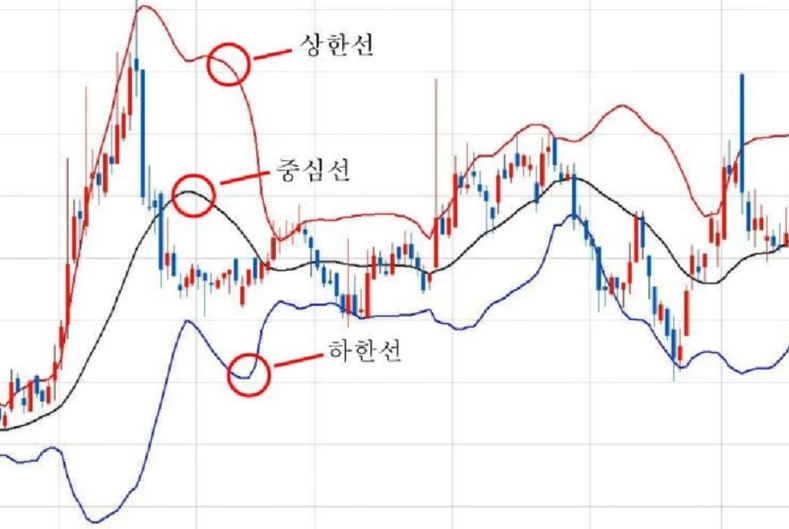

[pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)
- rolling 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하여 그 window안의 값을 추가 메서드를 통해 계산하는 메서드 입니다.

In [47]:
window = 20
df['sma_20'] = df['Close'].rolling(window=window).mean()
df['std_20'] = df['Close'].rolling(window=window).std()
df['bollinger_band_up'] = df.apply(lambda row: row['sma_20'] + row['std_20']*2, axis=1)
df['bollinger_band_down'] = df.apply(lambda row: row['sma_20'] - row['std_20']*2, axis=1)

In [48]:
df.drop(columns = ['sma_20', 'std_20'], inplace=True)

In [49]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,bollinger_band_up,bollinger_band_down
0,2024-01-04 00:00:00-05:00,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0,NaN,NaN
1,2024-01-05 00:00:00-05:00,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0,NaN,NaN
2,2024-01-08 00:00:00-05:00,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0,NaN,NaN
3,2024-01-09 00:00:00-05:00,183.023358,184.247357,181.839157,184.237411,42841800,0.0,0.0,NaN,NaN
4,2024-01-10 00:00:00-05:00,183.451277,185.491271,183.023365,185.282303,46792900,0.0,0.0,NaN,NaN


In [50]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [51]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='종가', line_color="green"), secondary_y=False)

fig.add_trace(go.Scatter(x=df['Date'], y=df['bollinger_band_up'], mode='lines', name='상한선', line_color="red"), secondary_y=False)
fig.add_trace(go.Scatter(x=df['Date'], y=df['bollinger_band_down'], mode='lines', name='하한선', line_color="blue"), secondary_y=False)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# [RSI (상대 강도 지수)](https://timepercentcorp.com/patchnote/rsi)

- RSI는 주가의 과매수와 과매도 상태를 확인하고, 추세의 강도와 방향을 측정하는 데 사용되는 기술적 지표입니다.
- 1978년 J. 웰스 와일더(J. Welles Wilder)에 의해 개발되었습니다.
- 공식
$$
RSI = 100 - ({ 100 \over 1 + RS})
$$
  - RS: 특정 기간 동안의 평균 상승폭(평균 이익)과 평균 하락폭(평균 손실)의 비율


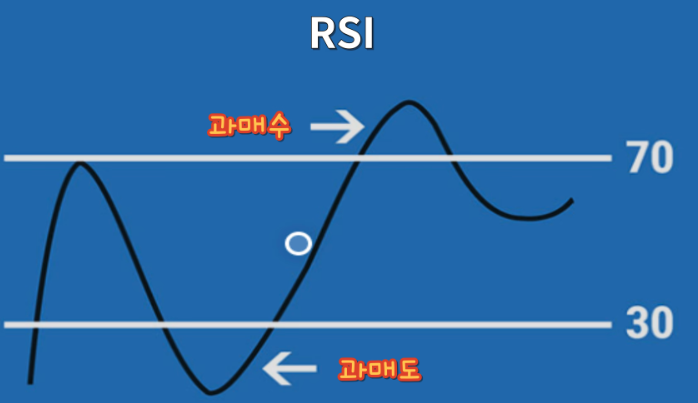

[pandas.DataFrame.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)
- diff는 한 객체 내에서 열과 열 / 행과 행의 차이를 출력하는 메서드 입니다.

In [52]:
# 가격 변화
closs_diff = df['Close'].diff(1)

# 상승폭과 하락폭 분리
gain = closs_diff.where(closs_diff > 0, 0)  # 상승폭 (양수만 남김)
loss = -closs_diff.where(closs_diff < 0, 0)  # 하락폭 (음수를 양수로 변환)

# 평균 상승폭과 평균 하락폭 계산 (EMA 사용)
avg_gain = gain.rolling(window=14, min_periods=1).mean()
avg_loss = loss.rolling(window=14, min_periods=1).mean()

# RS (Relative Strength) 계산
rs = avg_gain / avg_loss

# RSI 계산
df['rsi'] = 100 - (100 / (1 + rs))

In [53]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,bollinger_band_up,bollinger_band_down,rsi
0,2024-01-04 00:00:00-05:00,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0,NaN,NaN,NaN
1,2024-01-05 00:00:00-05:00,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0,NaN,NaN,0.000000
2,2024-01-08 00:00:00-05:00,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0,NaN,NaN,85.713814
3,2024-01-09 00:00:00-05:00,183.023358,184.247357,181.839157,184.237411,42841800,0.0,0.0,NaN,NaN,79.203937
4,2024-01-10 00:00:00-05:00,183.451277,185.491271,183.023365,185.282303,46792900,0.0,0.0,NaN,NaN,82.522464


In [54]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='종가', line_color="green"), secondary_y=False)


fig.add_trace(go.Scatter(x=df['Date'], y=df['rsi'], mode='lines', name='rsi', line_color="purple"), secondary_y=True)
fig.add_hline(y=70,line_width=3, line_dash="dash",
          line_color="red",
          annotation_text="과매수",
          annotation_position="top right",
          annotation_font_size=20,
          annotation_font_color="red",
          annotation_font_family="Times New Roman", secondary_y=True)
fig.add_hline(y=30,line_width=3, line_dash="dash",
          line_color="blue",
          annotation_text="과매도",
          annotation_position="bottom right",
          annotation_font_size=20,
          annotation_font_color="blue",
          annotation_font_family="Times New Roman", secondary_y=True)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# [ADX (평균 방향 지수)](https://timepercentcorp.com/patchnote/adx)
- ADX는 시장 추세의 강도를 측정하는 기술적 지표로, J. 웰스 와일더(J. Welles Wilder)에 의해 개발되었습니다.
- ADX는 특정 추세가 상승인지 하락인지와는 관계없이 추세의 강도를 나타냅니다.

ADX 계산 방법
1. True Range (TR, 진폭)
$$
TR = max(금일 고가 - 금일 저가, |금일 고가 - 전일 종가|, |금일 저가 - 전일 종가|)
$$
2. +DM (Positive Directional Movement, 양의 방향 움직임)
$$
+DM = max(금일고가 - 전일고가, 0)
$$
3. -DM (Negative Directional Movement, 음의 방향 움직임)
$$
-DM = max(전일저가, 금일저가, 0)
$$
4. +DI와 -DI 계산
  - $ +DI = { +DM의 N일 합 \over TR의 N일 합 }$ x 100
  - $ -DI = { -DM의 N일 합 \over TR의 N일 합 }$ x 100
5. Directional Movement Index (DX) 계산
  - $ DX = {|+DI - (-DI)| \over +DI + (-DI) } $ x 100
6. ADX 계산
  - ADX = DX의 N일 이동평균

[pandas.DataFrame.combine](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine.html)
- 함수를 이용한 열 단위 결합함수

[pandas.DataFrame.shift](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)
- 행 위, 아래로 옮기는 함수

In [58]:
# True Range (TR) 계산
df['TR'] = (
    df['High'] - df['Low']
).combine(
    abs(df['High'] - df['Close'].shift(1)), max
).combine(
    abs(df['Low'] - df['Close'].shift(1)), max
)
# +DM과 -DM 계산
df['+DM'] = df['High'].diff().apply(lambda x: x if x > 0 else 0)
df['-DM'] = -df['Low'].diff().apply(lambda x: x if x < 0 else 0)
# TR, +DM, -DM의 14일 이동 합계 계산
df['TR_rolling'] = df['TR'].rolling(window=14).sum()
df['+DM_rolling'] = df['+DM'].rolling(window=14).sum()
df['-DM_rolling'] = df['-DM'].rolling(window=14).sum()
# +DI, -DI 계산
df['+DI'] = (df['+DM_rolling'] / df['TR_rolling']) * 100
df['-DI'] = (df['-DM_rolling'] / df['TR_rolling']) * 100
# DX 계산
df['DX'] = (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])) * 100
# ADX 계산 (DX의 N일 이동 평균)
df['ADX'] = df['DX'].rolling(window=14).mean()

In [60]:
df.drop(columns = ['TR', '+DM', '-DM', 'TR_rolling', '+DM_rolling', '-DM_rolling', 'DX'], inplace=True)

In [61]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,bollinger_band_up,bollinger_band_down,rsi,+DI,-DI,ADX
0,2024-01-04 00:00:00-05:00,181.261998,182.197418,179.998201,181.023178,71983600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-05 00:00:00-05:00,181.102771,181.869006,179.291637,180.296707,62303300,0.0,0.0,NaN,NaN,0.000000,NaN,NaN,NaN
2,2024-01-08 00:00:00-05:00,181.202281,184.695178,180.615161,184.655365,59144500,0.0,0.0,NaN,NaN,85.713814,NaN,NaN,NaN
3,2024-01-09 00:00:00-05:00,183.023358,184.247357,181.839157,184.237411,42841800,0.0,0.0,NaN,NaN,79.203937,NaN,NaN,NaN
4,2024-01-10 00:00:00-05:00,183.451277,185.491271,183.023365,185.282303,46792900,0.0,0.0,NaN,NaN,82.522464,NaN,NaN,NaN


In [62]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='종가', line_color="green"), secondary_y=False)

fig.add_trace(go.Scatter(x=df['Date'], y=df['ADX'], mode='lines', name='adx', line_color="purple"), secondary_y=True)
fig.add_hline(y=25,line_width=3, line_dash="dash",
          line_color="red",
          annotation_text="시장의 추세가 강화",
          annotation_position="top right",
          annotation_font_size=20,
          annotation_font_color="red",
          annotation_font_family="Times New Roman", secondary_y=True)
fig.add_hline(y=20,line_width=3, line_dash="dash",
          line_color="blue",
          annotation_text="시장의 추세가 약화",
          annotation_position="bottom right",
          annotation_font_size=20,
          annotation_font_color="blue",
          annotation_font_family="Times New Roman", secondary_y=True)

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()